In [2]:
import sys
import pandas as pd
import numpy as np
import datetime, time
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [8]:
from src.utils import convierte_a_minusculas

In [3]:
#### Asisting configuration
sys.path.append("..")

In [4]:
pd.set_option('display.max_rows', 200)

In [41]:
df = pd.read_csv("../data/ds_challenge_apr2021.csv")

## Limpieza

In [42]:
df = df.rename(columns={'ID_USER':'id_user'})
df['fecha'] = pd.to_datetime(df['fecha'])

In [43]:
df = convierte_a_minusculas(df)

In [44]:
df['fraude'] = df['fraude'].apply(lambda x: 1 if x==True else 0)
df['is_prime'] = df['is_prime'].apply(lambda x: 'si_prime' if x==True else 'no_prime')

In [45]:
df['tipo_tc'].loc[df['tipo_tc']=='física']='fisica'

/Users/ele/.pyenv/versions/dpa_env/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [46]:
df['genero'][df['genero']=='--']='no_def'

/Users/ele/.pyenv/versions/dpa_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Valores nulos


In [47]:
df.isna().sum()

id_user                0
genero                 0
monto                  0
fecha                  0
hora                   0
dispositivo            0
establecimiento    10119
ciudad             11678
tipo_tc                0
linea_tc               0
interes_tc             0
status_txn             0
is_prime               0
dcto                   0
cashback               0
fraude                 0
dtype: int64

In [48]:
df['establecimiento']=df['establecimiento'].fillna('NA_establecimiento')

In [49]:
df['ciudad']=df['ciudad'].fillna('NA_establecimiento')

In [50]:
X=df['establecimiento'].values.reshape(df.shape[0],1)

In [51]:
imputador = SimpleImputer(strategy="most_frequent")

In [52]:
imputador.fit(X)

SimpleImputer(strategy='most_frequent')

In [53]:
estable_impu = imputador.transform(X)

In [54]:
df['esta_impu']=estable_impu

<AxesSubplot:xlabel='establecimiento', ylabel='count'>

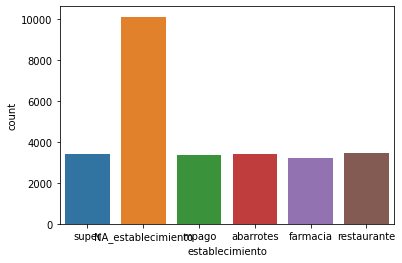

In [55]:
sns.countplot(x='establecimiento',data=df)

In [142]:
X = df['dcto'].values.reshape(df.shape[0],1)

In [143]:
from sklearn.preprocessing import Normalizer

In [153]:
standard_scaler = StandardScaler()
#standard_scaler = RobustScaler()

In [145]:
standard_scaler.fit(X)

RobustScaler()

In [146]:
#standard_scaler.mean_

In [147]:
hola=pd.DataFrame(standard_scaler.transform(X).reshape(df.shape[0]))

<AxesSubplot:ylabel='Count'>

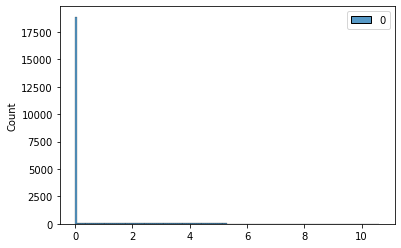

In [148]:
sns.histplot(hola)

### Onehotencoding

In [154]:
transformers = [('one_hot', OneHotEncoder(sparse = False, categories = "auto"),
                 ['tipo_tc', 'is_prime', 'genero', 'establecimiento', 'ciudad']),
               ('standar_scaler', standard_scaler, ['monto', 'dcto','cashback'])]
col_trans = ColumnTransformer(transformers, remainder="drop", n_jobs=-1, verbose=True)

In [155]:
df_regressors = col_trans.fit(df)
df_regressors

ColumnTransformer(n_jobs=-1,
                  transformers=[('one_hot', OneHotEncoder(sparse=False),
                                 ['tipo_tc', 'is_prime', 'genero',
                                  'establecimiento', 'ciudad']),
                                ('standar_scaler', StandardScaler(),
                                 ['monto', 'dcto', 'cashback'])],
                  verbose=True)

In [163]:
df.ciudad.unique()

array(['merida', 'guadalajara', 'toluca', 'monterrey',
       'NA_establecimiento'], dtype=object)

In [156]:
df_transformed = df_regressors.transform(df)

In [181]:
A = [sorted(df.tipo_tc.unique()),
    sorted(df.is_prime.unique()),
    sorted(df.genero.unique()),
    sorted(df.establecimiento.unique()),
    sorted(df.ciudad.unique())]

colnames = sum(A, [])

In [182]:
colnames.append('monto')
colnames.append('dcto')
colnames.append('cashback')

In [183]:
colnames

['fisica',
 'virtual',
 'no_prime',
 'si_prime',
 'f',
 'm',
 'no_def',
 'NA_establecimiento',
 'abarrotes',
 'farmacia',
 'mpago',
 'restaurante',
 'super',
 'NA_establecimiento',
 'guadalajara',
 'merida',
 'monterrey',
 'toluca',
 'monto',
 'dcto',
 'cashback']

In [184]:
final_df = pd.DataFrame(df_transformed, columns = colnames)

In [185]:
final_df['id']=df['id_user']

In [191]:
df_transformed.shape

(26975, 21)

In [192]:
final_df.shape

(26975, 22)

In [186]:
final_df

,fisica,virtual,no_prime,si_prime,f,m,no_def,NA_establecimiento,abarrotes,farmacia,...,super,NA_establecimiento,guadalajara,merida,monterrey,toluca,monto,dcto,cashback,id
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.377721,1.263136,-0.176315,0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-1.418404,-0.508714,-1.006380,0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.005752,-0.508714,2.139704,1
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.926139,-0.508714,0.316006,1
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.846509,-0.508714,-0.834270,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.854196,-0.508714,0.269322,3999
26971,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.530346,-0.508714,0.708078,3999
26972,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.856813,-0.508714,-0.277543,3999
26973,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.641479,-0.438280,-1.355553,3999


# x

In [196]:
from sklearn.feature_selection import VarianceThreshold

In [197]:
variance_threshold = VarianceThreshold(threshold=0.1)
variance_threshold.fit(df_transformed)

VarianceThreshold(threshold=0.1)

In [198]:
variance_threshold.transform(df_transformed)

array([[ 1.        ,  0.        ,  1.        , ...,  0.37772061,
         1.2631362 , -0.1763149 ],
       [ 0.        ,  1.        ,  1.        , ..., -1.41840427,
        -0.50871352, -1.00637968],
       [ 0.        ,  1.        ,  1.        , ...,  1.00575175,
        -0.50871352,  2.13970429],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -0.85681316,
        -0.50871352, -0.27754342],
       [ 1.        ,  0.        ,  1.        , ..., -1.64147946,
        -0.4382798 , -1.35555328],
       [ 1.        ,  0.        ,  1.        , ...,  0.06270141,
        -0.50871352, -0.24428117]])

In [199]:
variance_threshold.variances_

array([0.20969544, 0.20969544, 0.11452961, 0.11452961, 0.23951986,
       0.24999864, 0.0909624 , 0.23440626, 0.11057147, 0.10574084,
       0.10857103, 0.1116491 , 0.11021133, 0.24550019, 0.12190368,
       0.11998595, 0.11851143, 0.12621863, 1.        , 1.        ,
       1.        ])

In [201]:
X = df_transformed
X

array([[ 1.        ,  0.        ,  1.        , ...,  0.37772061,
         1.2631362 , -0.1763149 ],
       [ 0.        ,  1.        ,  1.        , ..., -1.41840427,
        -0.50871352, -1.00637968],
       [ 0.        ,  1.        ,  1.        , ...,  1.00575175,
        -0.50871352,  2.13970429],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -0.85681316,
        -0.50871352, -0.27754342],
       [ 1.        ,  0.        ,  1.        , ..., -1.64147946,
        -0.4382798 , -1.35555328],
       [ 1.        ,  0.        ,  1.        , ...,  0.06270141,
        -0.50871352, -0.24428117]])

### Selección de variables

In [204]:
y = df['fraude'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [205]:
print(X.shape, y.shape)

(26975, 21) (26975,)


In [206]:
# ocuparemos un RF
classifier = RandomForestClassifier(oob_score=True, random_state=1234)

# separando en train, test
X_train, X_test, y_train, y_test = train_test_split(X, y)

# definicion de los hiperparametros que queremos probar

hyper_param_grid = {'n_estimators': [200], 
                    'max_depth': [2, 3],
                    'min_samples_split': [2, 3, 5, 7, 10]}

# ocupemos grid search!
gs = GridSearchCV(classifier, 
                           hyper_param_grid, 
                           scoring = 'precision', #
                           cv = 5, 
                           n_jobs = -1)

start_time = time.time()
gs.fit(X, y)
print("Tiempo de ejecución: ", time.time() - start_time)

Tiempo de ejecución:  76.0778341293335


In [207]:
gs.best_params_

{'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 200}

In [221]:
gs.best_estimator_

RandomForestClassifier(max_depth=2, n_estimators=200, oob_score=True,
                       random_state=1234)

In [222]:
gs.best_estimator_.oob_score_

0.9699721964782205

In [211]:
etiquetas_predichas = gs.predict(X_test)

In [212]:
score_predicho = gs.predict_proba(X_test)

In [213]:
gs.best_estimator_.feature_importances_

array([0.03016046, 0.02308267, 0.01887969, 0.01882379, 0.01558347,
       0.03542913, 0.02726275, 0.03460171, 0.01059927, 0.0208259 ,
       0.01961776, 0.02524333, 0.01566102, 0.01849424, 0.02259409,
       0.02074598, 0.02633747, 0.02182132, 0.18087149, 0.15466177,
       0.25870268])

In [217]:
importancias = pd.DataFrame(colnames ,gs.best_estimator_.feature_importances_)

In [219]:
importancias['predictores'] = importancias.loc[:,0]

In [220]:
importancias.reset_index().iloc[:, [2,0]].sort_values(by = 'index', ascending=False)

,predictores,index
20,cashback,0.258703
18,monto,0.180871
19,dcto,0.154662
5,m,0.035429
7,NA_establecimiento,0.034602
0,fisica,0.030160
6,no_def,0.027263
16,monterrey,0.026337
11,restaurante,0.025243
1,virtual,0.023083


In [223]:
#X_test = np.where(np.nan, 0)
n = X_test.shape[0]
for i in range(n):
    X_test[i] = np.nan_to_num(X_test[i])

In [224]:
X_test

array([[ 1.        ,  0.        ,  1.        , ..., -1.72373835,
        -0.50759269, -1.40359351],
       [ 1.        ,  0.        ,  1.        , ...,  1.36975025,
        -0.50871352,  0.60386666],
       [ 1.        ,  0.        ,  0.        , ..., -1.07342413,
        -0.50871352, -0.98151639],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -1.15529367,
        -0.50871352, -0.66491319],
       [ 1.        ,  0.        ,  0.        , ..., -1.44513381,
        -0.50871352, -1.22271989],
       [ 1.        ,  0.        ,  1.        , ..., -1.44111579,
        -0.50871352, -1.22011259]])